In [1]:
pip install pandas seaborn matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.


              Year  Average Speed   Average RPM  Average Throttle  \
count  1937.000000    1937.000000   1937.000000       1937.000000   
mean   2020.069695     182.131357   9462.058198         58.491465   
std       1.466145      37.224718   1539.376863         11.008563   
min    2018.000000       0.000000      0.000000          1.639174   
25%    2019.000000     176.853414   9564.920755         54.613064   
50%    2020.000000     190.845576   9948.150795         60.934457   
75%    2021.000000     202.835176  10159.843503         64.628631   
max    2022.000000     243.059230  10913.603511        104.000000   

       Average Brake       Points  
count    1937.000000  1937.000000  
mean        0.211514     5.067888  
std         0.083451     7.218399  
min         0.000000     0.000000  
25%         0.179568     0.000000  
50%         0.202201     1.000000  
75%         0.226456     9.000000  
max         1.000000    26.000000  


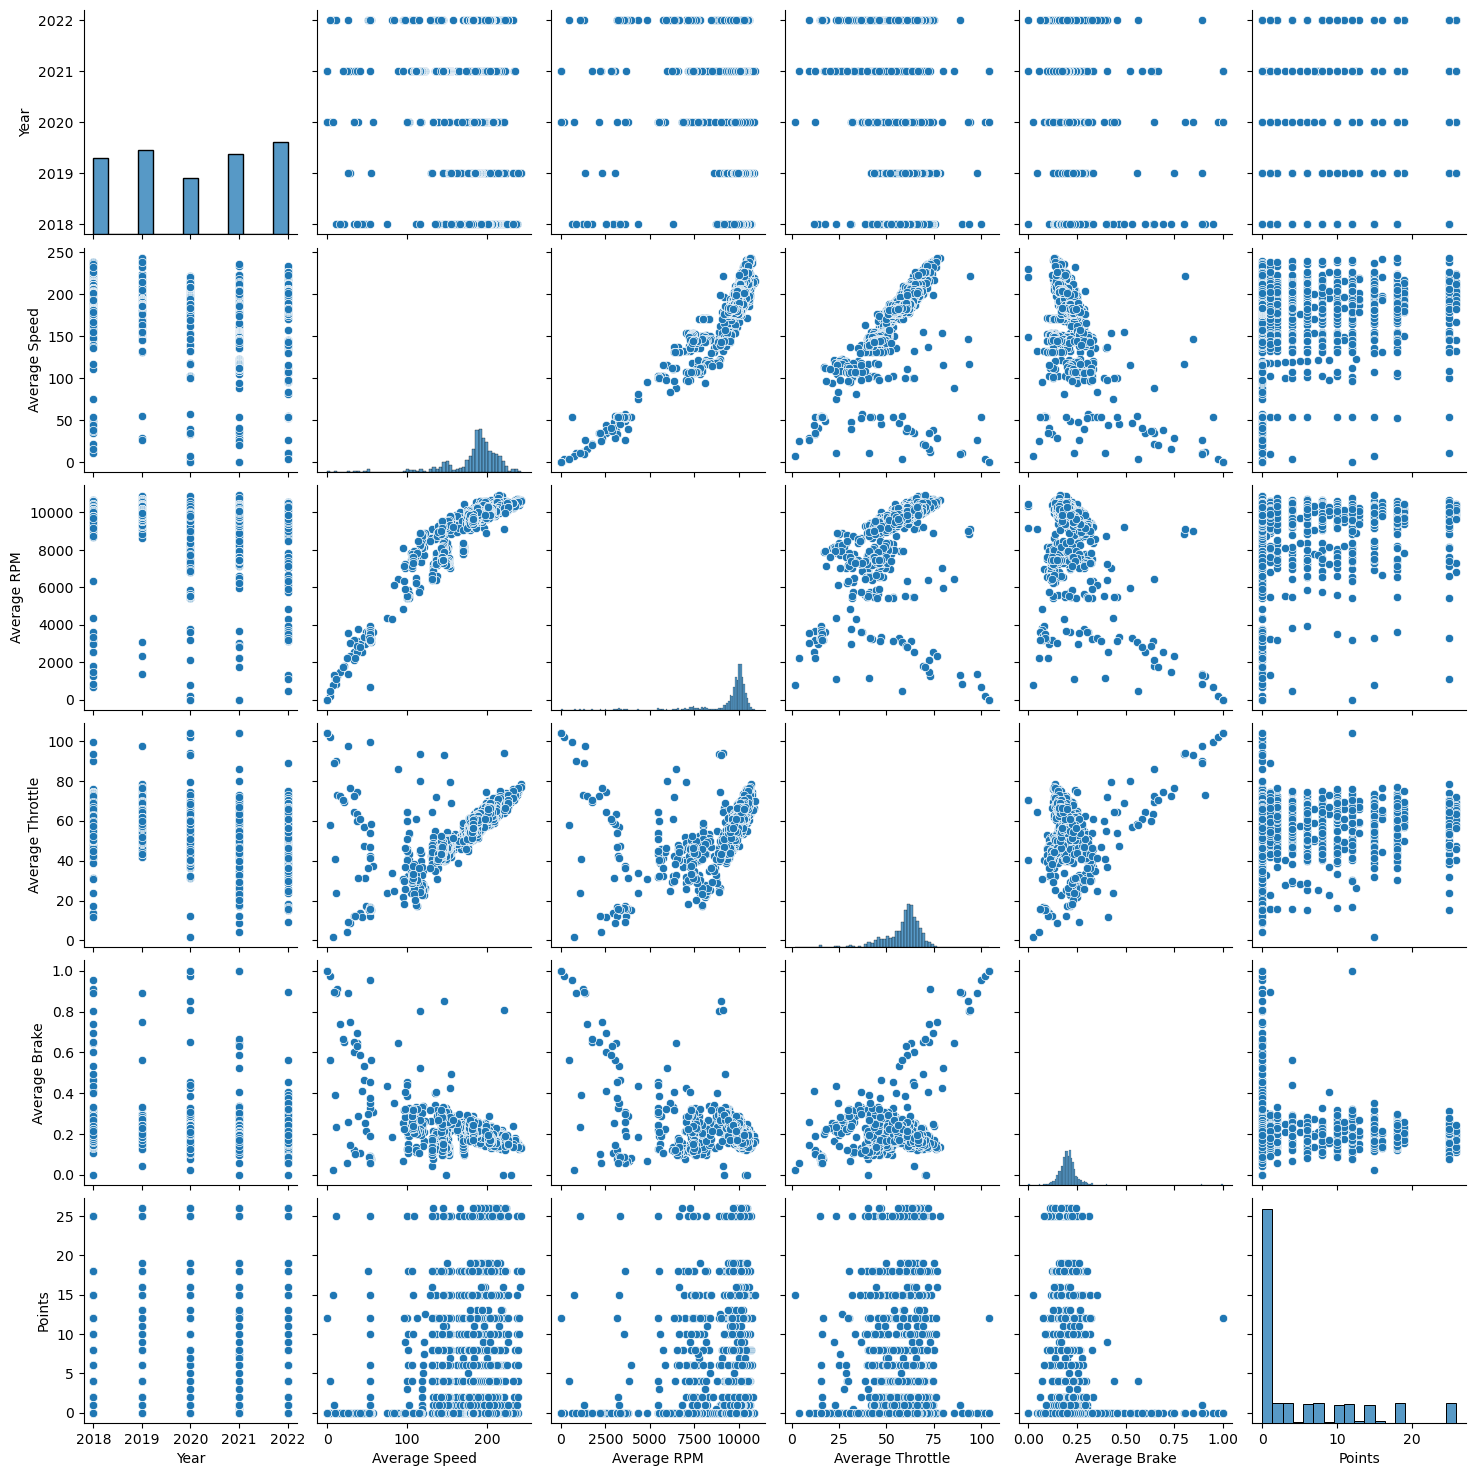

/var/folders/ly/hd9vyc5x2wg0mx_qv7hprdf80000gn/T/ipykernel_90484/3979977911.py:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f")


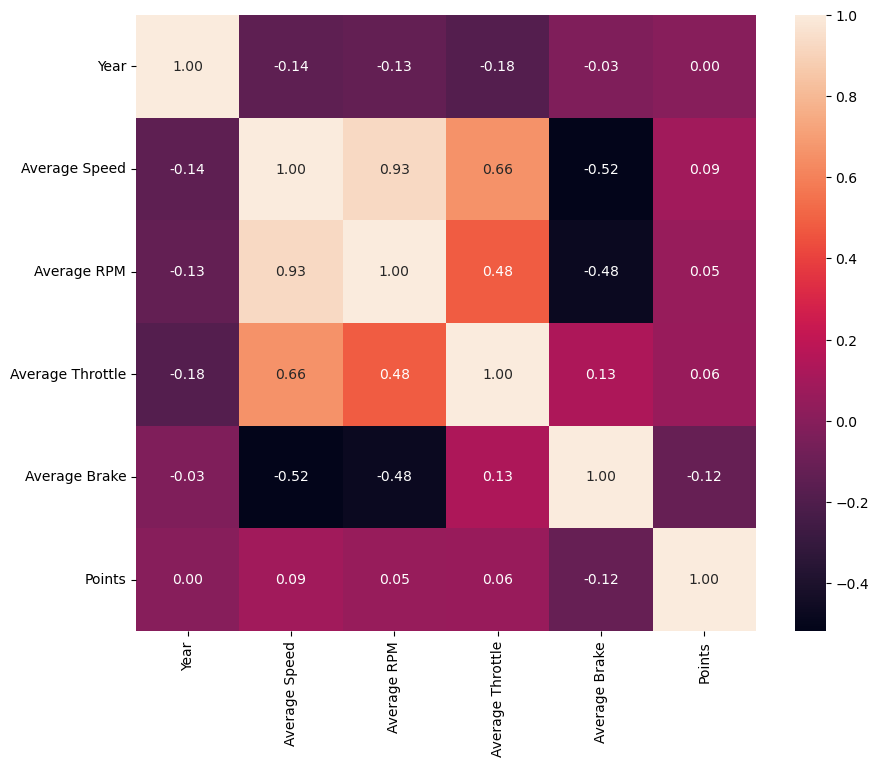

Coefficients: [-1.27398707e-02 -2.74768029e-04  1.03872977e-01 -1.72222806e+01]
Intercept: 7.5551587529150614
     Driver  Points  Predicted Points
0       RIC    25.0          5.343777
1       BOT    18.0          5.760367
2       RAI    15.0          5.199466
3       HAM    12.0          5.517999
4       VER    10.0          5.061595
...     ...     ...               ...
1932    MSC     0.0          5.757222
1933    MAG     0.0          5.834054
1934    HAM     0.0          6.195672
1935    LAT     0.0          4.975149
1936    ALO     0.0          5.632624

[1937 rows x 3 columns]


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('/Users/ravisolanki/Desktop/driverwise_yearly_data_with_points_2018_2022.csv')

# Exploratory Analysis
# Summary statistics
print(df.describe())

# Pairplot to visualize the relationship between features
sns.pairplot(df)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

# Regression Model
# Selecting features and target variable
X = df[['Average Speed', 'Average RPM', 'Average Throttle', 'Average Brake']]
y = df['Points']

# Initialize and fit the regression model
model = LinearRegression()
model.fit(X, y)

# Print out the coefficients of the model
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Predict points based on the model (without splitting into training and testing set)
df['Predicted Points'] = model.predict(X)

# Compare actual points to predicted points
print(df[['Driver', 'Points', 'Predicted Points']])


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Replace 'f1_data.csv' with the path to your CSV file
file_path = '/Users/ravisolanki/Desktop/driverwise_yearly_data_with_points_2018_2022.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Select numerical columns to be standardized
numerical_cols = ['Average Speed', 'Average RPM', 'Average Throttle', 'Average Brake']

# Initialize a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical columns and transform the data
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# If there are multiple races and you want to apply one-hot encoding
#df = pd.get_dummies(df, columns=['Race'], drop_first=True)

# Save the standardized dataset to a new CSV file
df.to_csv('f1_data_standardized.csv', index=False)

print("The dataset has been standardized and saved to 'f1_data_standardized.csv'.")


The dataset has been standardized and saved to 'f1_data_standardized.csv'.


In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

df = pd.read_csv('/Users/ravisolanki/Desktop/Trial_project/formula1_python/f1_data_standardized.csv')


features = ['Average Speed', 'Average RPM', 'Average Throttle', 'Average Brake']
X = df[features]
y = df['Points']

rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the whole dataset
rf.fit(X, y)

# Make predictions on the same dataset
y_pred = rf.predict(X)

# Calculate the R^2 score on the same dataset
r2 = r2_score(y, y_pred)

# Output the R^2 score
print(f'R^2 score on the dataset: {r2}')


R^2 score on the dataset: 0.8645329297331059


In [5]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


df = pd.read_csv('/Users/ravisolanki/Desktop/Trial_project/formula1_python/f1_data_standardized.csv')


features = ['Average Speed', 'Average RPM', 'Average Throttle', 'Average Brake']
X = df[features]
y = df['Points']


rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation and store the scores
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')

# Output the cross-validated R^2 scores and the mean score
print(f'Cross-validated R^2 scores: {cv_scores}')
print(f'Average cv score: {cv_scores.mean()}')


Cross-validated R^2 scores: [-0.08502072  0.03280571 -0.04744174 -0.07564544 -0.15251438]
Average cv score: -0.06556331274932858


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv('/Users/ravisolanki/Desktop/Trial_project/formula1_python/f1_data_standardized.csv')

# Define the features and the target
features = ['Average Speed', 'Average RPM', 'Average Throttle', 'Average Brake']
X = df[features]
y = df['Points']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVR(kernel='rbf')

svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print out the R^2 score and the mean squared error
print(f'SVM R^2 score on test data: {r2}')
print(f'SVM Mean Squared Error on test data: {mse}')


SVM R^2 score on test data: -0.29478552763933097
SVM Mean Squared Error on test data: 67.18550797766106


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score


df = pd.read_csv('/Users/ravisolanki/Desktop/Trial_project/formula1_python/f1_data_standardized.csv')

# Define the features and the target
features = ['Average Speed', 'Average RPM', 'Average Throttle', 'Average Brake']
X = df[features]
y = df['Points']

#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model with the training data
model.fit(X_train, y_train)

# Predict the points on the testing set
y_pred = model.predict(X_test)

# Calculate the R^2 score and Mean Squared Error for the test set
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Output the R^2 score and MSE
print(f'Test R^2 score: {r2}')
print(f'Test MSE: {mse}')

cv_results = cross_val_score(model, X, y, cv=5, scoring='r2')

# Output the results of the cross-validation
print(f'Cross-validation R^2 scores: {cv_results}')
print(f'Average CV score: {cv_results.mean()}')


Test R^2 score: 0.01701124383849184
Test MSE: 51.00659337724435
Cross-validation R^2 scores: [ 0.03643848  0.0289932   0.02938998  0.03990161 -0.05115573]
Average CV score: 0.016713508063660877


In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv('/Users/ravisolanki/Desktop/driverwise_yearly_data_with_points_2018_2022.csv')

# Define the features and the target
features = ['Average Speed', 'Average RPM', 'Average Throttle', 'Average Brake']
X = df[features]
y = df['Points']

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model with your data
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Calculate the R^2 score
r2 = r2_score(y, predictions)

# Output the R^2 score
print(f'R^2 score: {r2}')


R^2 score: 0.024086991295197535


In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


df = pd.read_csv('/Users/ravisolanki/Desktop/driverwise_yearly_data_with_points_2018_2022.csv')

# Define the features and the target
features = ['Average Speed', 'Average RPM', 'Average Throttle', 'Average Brake']
X = df[features]
y = df['Points']

# Initialize the Linear Regression model
model = LinearRegression()

cv_results = cross_val_score(model, X, y, cv=5, scoring='r2')

# Output the results of the cross-validation
print(f'Cross-validation R^2 scores: {cv_results}')
print(f'Average CV score: {cv_results.mean()}')


Cross-validation R^2 scores: [ 0.03643848  0.0289932   0.02938998  0.03990161 -0.05115573]
Average CV score: 0.01671350806366003


In [6]:
average_cv_score = cv_results.mean()

print("Average CV Score:", average_cv_score)

Average CV Score: 0.01671350806366003


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv('/Users/ravisolanki/Desktop/driverwise_yearly_data_with_points_2018_2022.csv')

# Define the features and the target
features = ['Average Speed', 'Average RPM', 'Average Throttle', 'Average Brake']
X = df[features]
y = df['Points']

#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model with the training data
model.fit(X_train, y_train)

# Predict the points on the testing set
y_pred = model.predict(X_test)

# Calculate the R^2 score and Mean Squared Error for the test set
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Output the R^2 score and MSE
print(f'Test R^2 score: {r2}')
print(f'Test MSE: {mse}')


Test R^2 score: 0.017011243838491064
Test MSE: 51.006593377244386


In [17]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

df = pd.read_csv('/Users/ravisolanki/Desktop/driverwise_yearly_data_with_points_2018_2022.csv')



# Define the features and the target
features = ['Average Speed', 'Average RPM', 'Average Throttle', 'Average Brake']
X = df[features]
y = df['Points']

# Initialize the Linear Regression model
model = LinearRegression()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print the R^2 score for each fold
print("R^2 scores for each fold:", cv_scores)

# Print the average cvscore across all folds
print("Average CV score:", cv_scores.mean())

R^2 scores for each fold: [ 0.03643848  0.0289932   0.02938998  0.03990161 -0.05115573]
Average CV score: 0.01671350806366003


In [ ]:
#Random Forest without training and testing

In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

df = pd.read_csv('/Users/ravisolanki/Desktop/driverwise_yearly_data_with_points_2018_2022.csv')


features = ['Average Speed', 'Average RPM', 'Average Throttle', 'Average Brake']
X = df[features]
y = df['Points']

rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the whole dataset
rf.fit(X, y)

# Make predictions on the same dataset
y_pred = rf.predict(X) 

# Calculate the R^2 score on the same dataset
r2 = r2_score(y, y_pred)

# Output the R^2 score
print(f'R^2 score on the dataset: {r2}')


R^2 score on the dataset: 0.8645329297331059


In [18]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


df = pd.read_csv('/Users/ravisolanki/Desktop/driverwise_yearly_data_with_points_2018_2022.csv')


features = ['Average Speed', 'Average RPM', 'Average Throttle', 'Average Brake']
X = df[features]
y = df['Points']


rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation and store the scores
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')

# Output the cross-validated R^2 scores and the mean score
print(f'Cross-validated R^2 scores: {cv_scores}')
print(f'Average cv score: {cv_scores.mean()}')


Cross-validated R^2 scores: [-0.08502072  0.03280571 -0.04771415 -0.07576339 -0.15251013]
Average cv score: -0.0656405349744823


In [ ]:
#Random Forest Regression with training and testing

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv('/Users/ravisolanki/Desktop/driverwise_yearly_data_with_points_2018_2022.csv')

# Define the features and the target
features = ['Average Speed', 'Average RPM', 'Average Throttle', 'Average Brake']
X = df[features]
y = df['Points']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model using R^2 score and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print out the R^2 score and the mean squared error
print(f'R^2 score on test data: {r2}')
print(f'Mean Squared Error on test data: {mse}')

# Perform 5-fold cross-validation and calculate R^2 scores
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')

# Print the R^2 score for each fold
print("R^2 scores for each fold:", cv_scores)

# Print the average R^2 score across all folds
print("Average CV R^2 score:", cv_scores.mean())

R^2 score on test data: 0.01801156787268199
Mean Squared Error on test data: 50.95468726851461
R^2 scores for each fold: [-0.08502072  0.03280571 -0.04771415 -0.07576339 -0.15251013]
Average CV R^2 score: -0.0656405349744823


In [ ]:
#Knn Model without training and testing

In [14]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

df = pd.read_csv('/Users/ravisolanki/Desktop/driverwise_yearly_data_with_points_2018_2022.csv')

# Define the features and the target
features = ['Average Speed', 'Average RPM', 'Average Throttle', 'Average Brake']
X = df[features]
y = df['Points']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the KNN Regressor
# n_neighbors is the number of neighbors to use; you can adjust this parameter
knn = KNeighborsRegressor(n_neighbors=5)

# Fit the model on the whole dataset
knn.fit(X_scaled, y)

# Make predictions on the same dataset
y_pred = knn.predict(X_scaled)

# Calculate the R^2 score on the same dataset
r2 = r2_score(y, y_pred)

# Output the R^2 score
print(f'R^2 score on the dataset: {r2}')


R^2 score on the dataset: 0.25536805533412177


In [ ]:
#Knn with training and testing

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

#
df = pd.read_csv('/Users/ravisolanki/Desktop/driverwise_yearly_data_with_points_2018_2022.csv')

# Define the features and the target
features = ['Average Speed', 'Average RPM', 'Average Throttle', 'Average Brake']
X = df[features]
y = df['Points']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


knn = KNeighborsRegressor(n_neighbors=5)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model using R^2 score
r2 = r2_score(y_test, y_pred)

# Output the R^2 score
print(f'R^2 score: {r2}')


R^2 score: -0.03703630308788619


In [ ]:
#SVM Training testing

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv('/Users/ravisolanki/Desktop/driverwise_yearly_data_with_points_2018_2022.csv')

# Define the features and the target
features = ['Average Speed', 'Average RPM', 'Average Throttle', 'Average Brake']
X = df[features]
y = df['Points']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVR(kernel='rbf')

svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print out the R^2 score and the mean squared error
print(f'SVM R^2 score on test data: {r2}')
print(f'SVM Mean Squared Error on test data: {mse}')


SVM R^2 score on test data: -0.2947855276393314
SVM Mean Squared Error on test data: 67.18550797766108


In [28]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Load the data
df = pd.read_csv('/Users/ravisolanki/Desktop/driverwise_yearly_data_with_points_2018_2022.csv')

# Define the features and the target
features = ['Average Speed', 'Average RPM', 'Average Throttle', 'Average Brake']
X = df[features]
y = df['Points']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Adjust these values based on your needs
    'gamma': [1, 0.1, 0.01, 0.001],  # Adjust these values based on your needs
    'kernel': ['rbf', 'poly', 'linear']
}

# Initialize the Grid Search model
grid_search = GridSearchCV(SVR(), param_grid, refit=True, verbose=3, cv=5)

# Fit the Grid Search model
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to make predictions on the test set
best_svr = grid_search.best_estimator_
y_pred = best_svr.predict(X_test_scaled)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print out the R^2 score and the mean squared error
print(f'SVM R^2 score with best parameters on test data: {r2}')
print(f'SVM Mean Squared Error with best parameters on test data: {mse}')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.287 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.455 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.263 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.337 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.418 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=1, kernel=poly;, score=-0.285 total time=   0.5s
[CV 2/5] END ......C=0.1, gamma=1, kernel=poly;, score=-0.539 total time=   0.8s
[CV 3/5] END ......C=0.1, gamma=1, kernel=poly;, score=-0.264 total time=   0.3s
[CV 4/5] END ......C=0.1, gamma=1, kernel=poly;, score=-0.391 total time=   0.6s
[CV 5/5] END ......C=0.1, gamma=1, kernel=poly;, score=-0.437 total time=   0.3s
[CV 1/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.276 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=linear;

[CV 1/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.296 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.516 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.271 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.342 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.472 total time=   0.0s
[CV 1/5] END ....C=1, gamma=0.001, kernel=poly;, score=-0.289 total time=   0.0s
[CV 2/5] END ....C=1, gamma=0.001, kernel=poly;, score=-0.572 total time=   0.0s
[CV 3/5] END ....C=1, gamma=0.001, kernel=poly;, score=-0.265 total time=   0.0s
[CV 4/5] END ....C=1, gamma=0.001, kernel=poly;, score=-0.468 total time=   0.0s
[CV 5/5] END ....C=1, gamma=0.001, kernel=poly;, score=-0.520 total time=   0.0s
[CV 1/5] END ..C=1, gamma=0.001, kernel=linear;, score=-0.275 total time=   0.0s
[CV 2/5] END ..C=1, gamma=0.001, kernel=linear;, score=-0.435 total time=   0.0s
[CV 3/5] END ..C=1, gamma=0.

[CV 4/5] END ..C=100, gamma=0.1, kernel=linear;, score=-0.317 total time=   0.2s
[CV 5/5] END ..C=100, gamma=0.1, kernel=linear;, score=-0.389 total time=   0.3s
[CV 1/5] END ....C=100, gamma=0.01, kernel=rbf;, score=-0.240 total time=   0.0s
[CV 2/5] END ....C=100, gamma=0.01, kernel=rbf;, score=-0.407 total time=   0.0s
[CV 3/5] END ....C=100, gamma=0.01, kernel=rbf;, score=-0.216 total time=   0.0s
[CV 4/5] END ....C=100, gamma=0.01, kernel=rbf;, score=-0.282 total time=   0.0s
[CV 5/5] END ....C=100, gamma=0.01, kernel=rbf;, score=-0.372 total time=   0.0s
[CV 1/5] END ...C=100, gamma=0.01, kernel=poly;, score=-0.288 total time=   0.0s
[CV 2/5] END ...C=100, gamma=0.01, kernel=poly;, score=-0.571 total time=   0.0s
[CV 3/5] END ...C=100, gamma=0.01, kernel=poly;, score=-0.266 total time=   0.0s
[CV 4/5] END ...C=100, gamma=0.01, kernel=poly;, score=-0.335 total time=   0.0s
[CV 5/5] END ...C=100, gamma=0.01, kernel=poly;, score=-0.510 total time=   0.0s
[CV 1/5] END .C=100, gamma=0